In [1]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import import_ipynb
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from distmesh import *
from FEM_Heat import *
#plt.style.use('seaborn')

importing Jupyter notebook from distmesh.ipynb
importing Jupyter notebook from FEM_Heat.ipynb


# Question 1

In [2]:
# parameters of bounding box
xmin = -2
xmax = 2
ymin = -2
ymax = 2

#Dirchlet conditions
Aval = 0
Bval = 0

# parameters defining circles
xc, yc = 0, 0       # circle center
ri = 1              # radius of inner circle
ro = 2              # radius of outer circle

# time parameters
tmin = 0  
tmax = 1 
dt = 0.01

#Aggregated parameters
par = np.array([xmin,ymin,xmax,ymax,xc,yc,ri])

# h0 is the desired scaling parameter for the mesh
h0 = 0.05

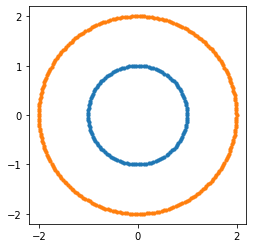

In [3]:
# points fixed on circle
Na = int(round(2*math.pi*ri/h0))
ptsA = put_pts_on_circle(xc,yc,ri,Na)

# points fixed on square
Nb = int(round(2*math.pi*ro/h0))
ptsB = put_pts_on_circle(xc,yc,ro,Nb)

#total points fixed
Nfix = Na + Nb

# scatter plot of fixed points
plt.scatter(ptsA[:,0],ptsA[:,1],s=10)
plt.scatter(ptsB[:,0],ptsB[:,1],s=10)
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})

count =  200 displacement =  0.010636376149220582
count =  400 displacement =  0.010453160482474308


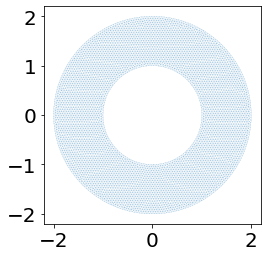

In [4]:
# mesh generation

bbox = [xmin,xmax,ymin,ymax]
pfix = np.zeros((Nfix,2))
    
pfix[0:Na,:] = ptsA
pfix[Na:Nfix,:] = ptsB

def dfunc(p):

    return ddiff(dcircle(p,xc,yc,ro),dcircle(p,xc,yc,ri))

pts, tri = distmesh2D(dfunc,huniform,h0,bbox,pfix)

Npts = np.size(pts,axis=0)
Ntri = np.size(tri,axis=0)

In [5]:
# find the mesh points lying on the Dirichlet boundary

NAind, Aind = find_bdry_pts_circle(pts,xc,yc,ri,h0)   #Dirchlet boundary at radius r = 1
NBind, Bind = find_bdry_pts_circle(pts,xc,yc,ro,h0)   #Dirchlet boundary at radius r = 2

#initial condition
q = np.zeros((Npts,1))
q = np.sqrt(pts[:,0]**2 + pts[:,1]**2).reshape(Npts,1) + ( pts[:,0]/(np.sqrt(pts[:,0]**2 + pts[:,1]**2)) ).reshape(Npts,1)

# find using FEM
soln = FEM_solver(pts,tri,Aind,Aval,Bind,Bval,tmin,tmax,dt,q)

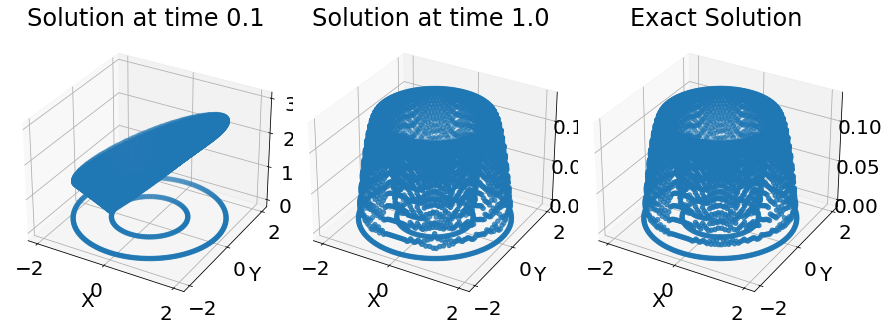

In [6]:
#exact solution

def exact(pts):
    
    r = np.sqrt(pts[:,0]**2 + pts[:,1]**2)
    
    return (1 - r**2)/4 + (3*np.log(r))/(4*np.log(2))


# visualize solution
fig, axs = plt.subplots(1, 3, figsize=(12, 12), subplot_kw={'projection': '3d'})

# Plot the first plot
ax1 = axs[0]
ax1.scatter(pts[:,0], pts[:,1], soln[0]) #int((0.1 - tmin)/dt)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Solution at time 0.1')
#ax1.legend()

# Plot the second plot
ax1 = axs[1]
ax1.scatter(pts[:,0], pts[:,1], soln[len(soln) - 1])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Solution at time 1.0')
#ax2.legend()

# Plot the third plot
ax2 = axs[2]
ax2.scatter(pts[:,0], pts[:,1], exact(pts))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Exact Solution')
#ax2.legend()

plt.tight_layout(pad=0.4)

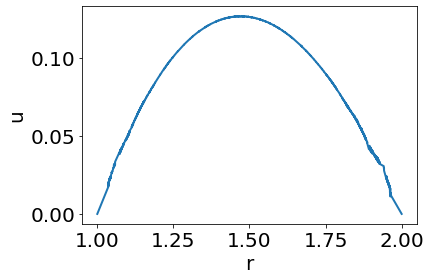

In [7]:
# Plot the fourth plot
u = soln[len(soln) - 1] # N+1 corresponds to t=1.
r = np.sqrt(pts[:, 0]**2 + pts[:, 1]**2)
isort = np.argsort(r)
rsort = r[isort]
usort = u[isort]

plt.plot(rsort, usort, linewidth=2)
plt.xlabel('r')
plt.ylabel('u')
plt.show()